Objectives:
        i) Experiments in Keras
       ii) Learning to work with Neural Network

# About Data

IMDB dataset: A set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

The IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

### Objectives:
         i) Experiments in Keras
        ii) Learning to work with Neural Network 
	   iii) Classify the data using Neural Network
	    iv) Work with the text data 
	     v) Transform the data for to be used in the model

In [1]:
# 1.0 Call libraries

import pandas as pd
import os

In [2]:
#Loading the IMDB dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [3]:
# The argument num_words=10000 means you’ll only keep the top 10,000 most frequently 
# occurring words in the training data. Rare words will be discarded

In [4]:
#The variables train_data and test_data are lists of reviews 
# Each review is a list of word indices (encoding a sequence of words)
# train_labels and test_labels are # lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

In [5]:
#train_data[0] #Each review is a list of word indices (encoding a sequence of words)

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])   #9999
#no word index will exceed 10,000

9999

In [8]:
#We can decode one of these reviews back to English words:

In [9]:
imdb.get_word_index?

In [10]:
word_index = imdb.get_word_index()
type(word_index)

dict

In [11]:
#word_index.items() #dictionary of words (key) to index (value)

In [12]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
##dictionary of index (key) to words (value)

In [13]:
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]]) #Taking one review data

In [14]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [15]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [16]:
'''Decodes the review. Note that the indices
are offset by 3 because 0, 1, and 2 are
reserved indices for “padding,” “start of sequence,” and “unknown”'''

'Decodes the review. Note that the indices\nare offset by 3 because 0, 1, and 2 are\nreserved indices for “padding,” “start of sequence,” and “unknown”'

In [17]:
train_data.ndim

1

In [18]:
train_data.shape

(25000,)

In [19]:
#list(enumerate(train_data))

In [20]:
# Encoding the integer sequences into a binary matrix

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
	#Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
		#Sets specific indices of results[i] to 1s
    return results

In [21]:
x_train = vectorize_sequences(train_data) #Vectorized training data

In [22]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [23]:
x_test = vectorize_sequences(test_data) #Vectorized test data

In [24]:
#You should also vectorize your labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [25]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [26]:
'''
There are two key architecture decisions to be made about such a stack of Dense layers:
1. How many layers to use
2. How many hidden units to choose for each layer
'''

'\nThere are two key architecture decisions to be made about such a stack of Dense layers:\n1. How many layers to use\n2. How many hidden units to choose for each layer\n'

In [27]:
#The model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
#choose a loss function and an optimizer

'''
Crossentropy is a quantity from the field of Information Theory
that measures the distance between probability distributions or, in this
case, between the ground-truth distribution and your predictions
'''
#Compiling the model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [29]:
#Using custom losses and metrics
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer= optimizers.RMSprop(lr = 0.002),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

C:\Users\986hi\.conda\envs\test2\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [30]:
#Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [31]:
#Training your model
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=10,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 38ms/step - loss: 0.4808 - binary_accuracy: 0.7685 - val_loss: 0.3278 - val_binary_accuracy: 0.8745
Epoch 2/10
30/30 [==============================] - 1s 22ms/step - loss: 0.2589 - binary_accuracy: 0.9035 - val_loss: 0.2744 - val_binary_accuracy: 0.8939
Epoch 3/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1932 - binary_accuracy: 0.9303 - val_loss: 0.2731 - val_binary_accuracy: 0.8912
Epoch 4/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1446 - binary_accuracy: 0.9483 - val_loss: 0.3014 - val_binary_accuracy: 0.8869
Epoch 5/10
30/30 [==============================] - 0s 16ms/step - loss: 0.1158 - binary_accuracy: 0.9599 - val_loss: 0.3584 - val_binary_accuracy: 0.8748
Epoch 6/10
30/30 [==============================] - 1s 18ms/step - loss: 0.0837 - binary_accuracy: 0.9729 - val_loss: 0.4304 - val_binary_accuracy: 0.8545
Epoch 7/10
30/30 [==============================] - 1s 18ms/step - los

In [32]:
'''
The call to model.fit() returns a History object. This object has a member
history, which is a dictionary containing data about everything that happened
during training.
'''

'\nThe call to model.fit() returns a History object. This object has a member\nhistory, which is a dictionary containing data about everything that happened\nduring training.\n'

In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [34]:
#[u'acc', u'loss', u'val_acc', u'val_loss']
#The dictionary contains four entries: one per metric that was being monitored during
#training and during validation

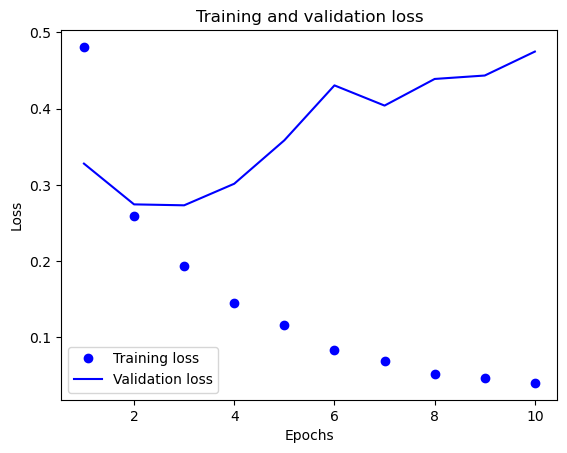

In [35]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
#epochs = range(1, len(acc) + 1)
epochs = range(1, 10 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

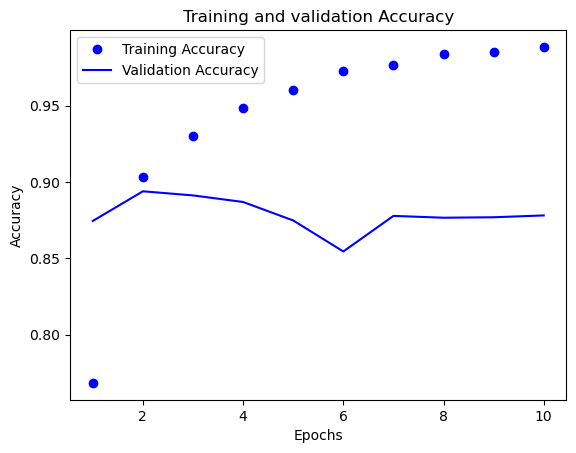

In [36]:
binary_accuracy_values = history_dict['binary_accuracy']
val_binary_accuracy_values = history_dict['val_binary_accuracy']
#epochs = range(1, len(acc) + 1)
epochs = range(1, 10 + 1)
plt.plot(epochs, binary_accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_binary_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()